Populating the interactive namespace from numpy and matplotlib
[[4.499510005282038, 1.938920125304249], [-2.6678039204361186, 8.935760689549225], [-6.951709616224192, -6.676216692254869]]


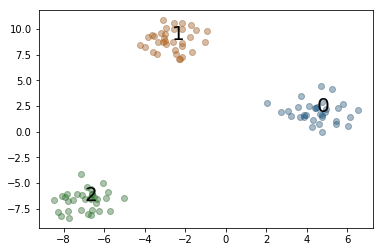

In [1]:
###------------- kMeeans cluster
### vector computing helper functions 
%pylab inline
import random
import matplotlib.pyplot as plt
import numpy as np


# inner product
def dot(v, w):
    return sum(v_i * w_i
              for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    return dot(v,v)

def vector_substract(v, w):
    return [v_i - w_i
            for v_i, w_i in zip(v, w)]

def vector_add(v, w):
    return [v_i + w_i
            for v_i, w_i in zip(v, w)]

def vector_sum(vectors):
    result = vectors[0]
    for vector in vectors[1:]:
        result = vector_add(result, vector)
    return result

def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

def vector_mean(vectors):
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

def squared_distance(v, w):
    return sum_of_squares(vector_substract(v, w))


# a kmeans class
class KMeans:
    def __init__(self,k):
        self.k = k
        self.means = None
    
    def classify(self, input):
        return min(range(self.k),
                  key = lambda i:squared_distance(input, self.means[i]))
    
    def train(self, inputs):
        # initial means
        self.means = random.sample(inputs,self.k)
        assignments = None
        
        while True:
            new_assignments = list(map(self.classify, inputs))
            # no change? then return the class
            if assignments == new_assignments:
                return
            
            assignments = new_assignments
            
            for i in range(self.k):
                i_points = [p for p,a in zip(inputs, assignments) if a== i]
                
                if i_points:
                    self.means[i] = vector_mean(i_points)
                    
random.seed(0)
cluster = KMeans(3)

# the training data already created as 3 groups
# just to verify our training result is correct thus to overlap the original data points

from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)

inputs = X.tolist()
cluster.train(inputs)
print(cluster.means)
plt.plot(X[:,0],X[:,1],'ok',alpha=.2)

res = []
for i in inputs:
    res.append(cluster.classify(i))
res = np.array(res)
for k in range(cluster.k):
    mask = (res == k)
    plt.plot(X[mask,0],X[mask,1],'o',alpha=.2)
    plt.text(cluster.means[k][0],cluster.means[k][1],k,size=20,color='k')